# CNN aplicado a clasificar imágenes de la base de datos MNIST
***
Ejemplo obtenido desde: https://keras.io/examples/vision/mnist_convnet/

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### MNIST dataset
****
- Revisar [MNIST](http://yann.lecun.com/exdb/mnist/)
- Problema de clasificación de imágenes
- 10 clases: 0, 1, 2, ..., 9

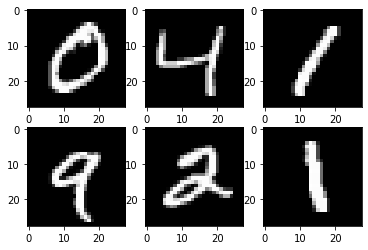

In [7]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(x_train[i], cmap="gray")
    


In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", 
                      kernel_initializer=keras.initializers.random_normal),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2022-11-09 08:38:48.784642: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 17s 38ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0273 - val_accuracy: 0.9925
Epoch 2/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0268 - val_accuracy: 0.9928
Epoch 3/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 4/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0268 - val_accuracy: 0.9927
Epoch 5/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.0263 - val_accuracy: 0.9933
Epoch 6/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 7/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0265 - val_accuracy:

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02253304421901703
Test accuracy: 0.9922000169754028


In [16]:
prediction = model.predict(x_test)
print("La predicción para cada imagen es un vector con 10 componentes")
print(prediction[0])

La predicción para cada imagen es un vector con 10 componentes
[6.1396649e-10 4.1255447e-11 3.5538096e-06 5.9391905e-06 7.7379523e-14
 1.5354712e-10 3.5843361e-18 9.9999022e-01 8.2858458e-09 2.1215676e-07]


In [17]:
prediction

array([[6.1396649e-10, 4.1255447e-11, 3.5538096e-06, ..., 9.9999022e-01,
        8.2858458e-09, 2.1215676e-07],
       [1.3523336e-07, 1.3639929e-06, 9.9999738e-01, ..., 3.8406184e-12,
        1.9296307e-08, 3.5096833e-13],
       [3.3224450e-07, 9.9982637e-01, 1.7423896e-06, ..., 2.9214078e-05,
        5.9001427e-06, 1.3193585e-07],
       ...,
       [1.5243743e-13, 4.1590545e-10, 2.4294627e-12, ..., 8.5076648e-09,
        1.1936825e-07, 5.5970704e-09],
       [4.7974808e-08, 1.1876924e-13, 9.6318686e-10, ..., 8.7509205e-13,
        6.3304084e-05, 1.8136292e-08],
       [1.0657383e-06, 7.2866522e-12, 2.1254791e-06, ..., 2.6054107e-12,
        1.8125509e-05, 6.9561090e-10]], dtype=float32)

### Analicemos las primeras imágenes del conjunto de testing

image  1 predicts  7
image  2 predicts  2
image  3 predicts  1
image  4 predicts  0
image  5 predicts  4
image  6 predicts  1


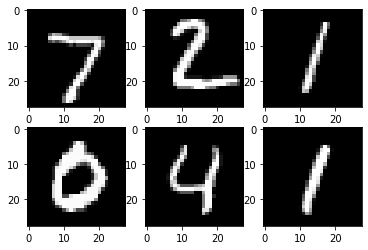

In [18]:
for i in range(1, 7):
    index_max = np.argmax(prediction[i-1,:])
    print("image ", i, "predicts ", index_max)
    plt.subplot(2, 3, i)
    plt.imshow(x_test[i-1,:,:,0], cmap="gray")